In [1]:
import glob
import scipy.io
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
% matplotlib inline

In [2]:
sp.init_printing()

# Problem A

We have the following matrix:

In [3]:
a, u0, k, c =sp.symbols('a, u0, k, c')
# k: wavenumber
# c: wave speed (phase speed)
D = [
     [sp.exp(-k*a), -sp.exp(-k*a), -sp.exp(k*a), 0, 0, 0],
     [0, 1, 1, -1, -1, 0],
     [0, 0, 0, sp.exp(k*a), sp.exp(-k*a), -sp.exp(-k*a)],
     [k*c*sp.exp(-k*a), (-k*c-u0/a)*sp.exp(-k*a), (k*c-u0/a)*sp.exp(k*a), 0, 0, 0],
     [0, -k*(u0-c)+(u0/a), k*(u0-c)+(u0/a), k*(u0-c)+(u0/a), -k*(u0-c)+(u0/a), 0],
     [0, 0, 0, (k*c-u0/a)*sp.exp(k*a), (-k*c-u0/a)*sp.exp(-k*a), k*c*sp.exp(-k*a)]
    ];
M = sp.Matrix(D)

## Solve wave speed c

Solve the determinant equals to zero for wave speed c

In [4]:
result = sp.solve(M.det(), c)

We get 3 roots (dispersion relation):

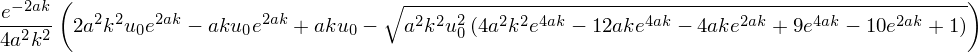

In [5]:
sp.simplify(result[0])

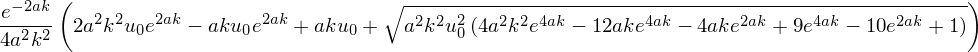

In [6]:
sp.simplify(result[1])

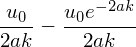

In [7]:
sp.simplify(result[2])

## Plot three roots

We plot the root to ge the threshold of stability in a case of:
$$
 U_0 = 1 \qquad a = 1 \qquad\ -3 < k <3
$$

In [8]:
k_num = np.linspace(-3, 3, 100)

In [9]:
num_result1 = np.empty([k_num.size]) + 1j*np.empty([k_num.size])
num_result2 = np.empty([k_num.size]) + 1j*np.empty([k_num.size])
num_result3 = np.empty([k_num.size]) + 1j*np.empty([k_num.size])
for i in range(len(k_num)):
    num_result1[i] = (result[0]).evalf(subs={k:k_num[i], a:1, u0:1})
    num_result2[i] = (result[1]).evalf(subs={k:k_num[i], a:1, u0:1})
    num_result3[i] = (result[2]).evalf(subs={k:k_num[i], a:1, u0:1})

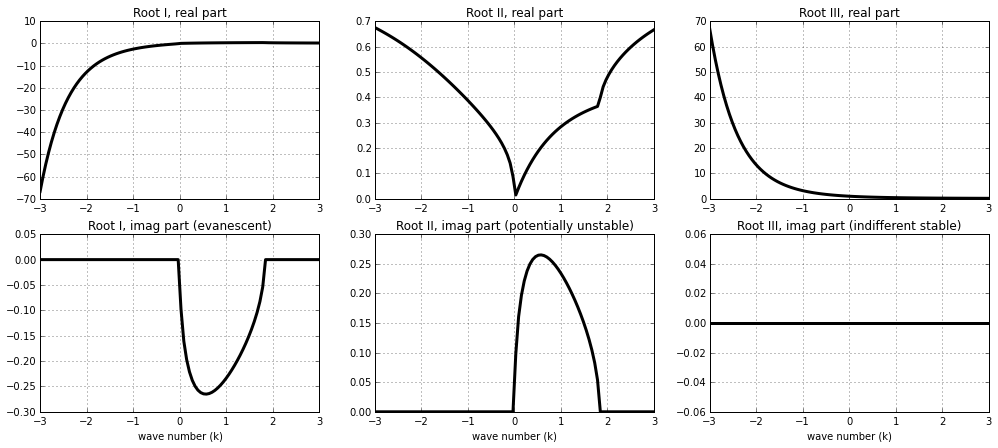

In [10]:
fig=plt.figure(figsize=(17, 7))

ax1=plt.subplot2grid((2, 3), (0, 0), colspan=1, rowspan=1)
ax2=plt.subplot2grid((2, 3), (0, 1), colspan=1, rowspan=1)
ax3=plt.subplot2grid((2, 3), (0, 2), colspan=1, rowspan=1)
ax4=plt.subplot2grid((2, 3), (1, 0), colspan=1, rowspan=1)
ax5=plt.subplot2grid((2, 3), (1, 1), colspan=1, rowspan=1)
ax6=plt.subplot2grid((2, 3), (1, 2), colspan=1, rowspan=1)

ax1.plot(k_num, num_result1.real, 'k-', linewidth=3)
ax1.set_title('Root I, real part', fontsize=12); ax1.grid()
ax2.plot(k_num, num_result2.real, 'k-', linewidth=3)
ax2.set_title('Root II, real part', fontsize=12); ax2.grid()
ax3.plot(k_num, num_result3.real, 'k-', linewidth=3)
ax3.set_title('Root III, real part', fontsize=12); ax3.grid()
ax4.plot(k_num, num_result1.imag, 'k-', linewidth=3); ax4.set_xlabel('wave number (k)')
ax4.set_title('Root I, imag part (evanescent)', fontsize=12); ax4.grid()
ax5.plot(k_num, num_result2.imag, 'k-', linewidth=3); ax5.set_xlabel('wave number (k)')
ax5.set_title('Root II, imag part (potentially unstable)', fontsize=12); ax5.grid()
ax6.plot(k_num, num_result3.imag, 'k-', linewidth=3); ax6.set_xlabel('wave number (k)')
ax6.set_title('Root III, imag part (indifferent stable)', fontsize=12); ax6.grid()

* The third root is always real, means it is indifferent stable.
* The first root has negative imaginary value which means it is evanescent.
* The second root has positive imaginary values, means it is potentially unstable, and it is only stable when wavenumber's imaginary part is 0.

In this case, $a = 1$, so the threshold of $k$ represents the range of $ka$.  

In [11]:
unstable = [k_num[num_result2.imag != 0].min(), k_num[num_result2.imag != 0].max()]
max_grow = [k_num[num_result2.imag == num_result2.imag.max()]]
print('Root II: the flow is stable when (ka < {}) or (ka > {})'. \
      format(unstable[0], unstable[1]))
print('ka with maximum growth rate: ka = {}'.format(max_grow))

Root II: the flow is stable when (ka < 0.030303030303) or (ka > 1.78787878788)
ka with maximum growth rate: ka = [ 0.57575758]


# Problem B

I get the data of 2 plots in Problem B from <a href='http://www.cpc.ncep.noaa.gov/products/GODAS/'>**NOAA/CPC - GODAS**</a> for a detailed discussion. Convert the data as \*.mat in use.

In [12]:
godas_name=glob.glob('_data/GODAS*.mat')
godas_obj=scipy.io.loadmat(godas_name[0])
latitude = godas_obj['latitude']
depth    = godas_obj['depth']
u = godas_obj['u']
s = godas_obj['s']

I skiped the part of reading and segmenting the data, so here I reproduce the 2 plots in Problem B.

<matplotlib.colorbar.Colorbar instance at 0x0000000015E030C8>

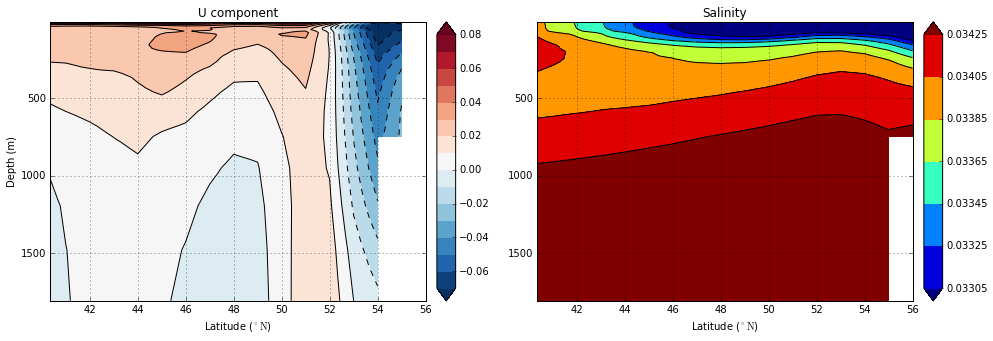

In [13]:
ulevs = np.arange(-0.07, 0.08, 0.01)
slevs = np.arange(33.05, 34.35, 0.2)/1000

fig=plt.figure(figsize=(16, 5))

ax1=plt.subplot2grid((1, 2), (0, 0), colspan=1, rowspan=1)
ax2=plt.subplot2grid((1, 2), (0, 1), colspan=1, rowspan=1)
divider1 = make_axes_locatable(ax1); cax1 = divider1.append_axes("right", "5%", pad="3%")
divider2 = make_axes_locatable(ax2); cax2 = divider2.append_axes("right", "5%", pad="3%")

CS=ax1.contourf(latitude, depth, u, ulevs, cmap=plt.cm.RdBu_r, extend='both')
ax1.contour(latitude, depth, u, ulevs, colors = ('k',), linewidth=1)
ax1.invert_yaxis(); ax1.grid(); ax1.set_title('U component', fontsize=12)
ax1.set_xlabel('Latitude ($\mathrm{^\circ N}$)'); ax1.set_ylabel('Depth (m)')
plt.colorbar(CS, cax=cax1)

CS=ax2.contourf(latitude, depth, s, slevs, cmap=plt.cm.jet, extend='both')
ax2.contour(latitude, depth, s, slevs, colors = ('k',), linewidth=1)
ax2.invert_yaxis(); ax2.grid(); ax2.set_title('Salinity', fontsize=12);
ax2.set_xlabel('Latitude ($\mathrm{^\circ N}$)')
plt.colorbar(CS, cax=cax2)

For baroclinic instability problem, the necessary condition comes from:
$$
    c_i \left[ \int_0^L{\int_{-H}^0{\frac{\left| \Psi\right|^2}{\left| U-c \right|^2}\left( \beta - \frac{\partial^2 U(y, z)}{\partial y^2} + \frac{\partial}{\partial z}\left( \frac{f_0^2}{N^2}\frac{\partial U(y, z)}{\partial z}\right)\right)dz }dy} + f_0^2 \int_0^L{\frac{\left| \Psi\right|^2}{N^2\left| U-c \right|^2}\left(\left.\frac{\partial U}{\partial z}\right|_{z=-H}^0\right) dy} \right] = 0 
$$

Based on our perious discussion, the uncertainty remains in the vorticity term:
$$
     \frac{\partial q}{\partial y} = \beta - \frac{\partial^2 U(y, z)}{\partial y^2} + \frac{\partial}{\partial z}\left( \frac{f_0^2}{N^2}\frac{\partial U(y, z)}{\partial z}\right)
$$

In [14]:
# Susan's density.f, temperature is 4degC.
def density(s, t=4):
    return 999.842594           + 6.793952e-2 * t             \
          - 9.095290e-3 * t*t       + 1.001685e-4 * t*t*t     \
          - 1.120083e-6 * t*t*t*t   + 6.536332e-9 * t*t*t*t*t \
          + 8.24493e-1  * s         - 4.0899e-3   * t*s       \
          + 7.6438e-5   * t*t*s     - 8.2467e-7   * t*t*t*s   \
          + 5.3875e-9   * t*t*t*t*s - 5.72466e-3  * s**1.5    \
          + 1.0227e-4   * t*s**1.5  - 1.6546e-6   * t*t*s**1.5\
          + 4.8314e-4   * s*s                                 \

For incompressible fluid, Brunt-visala frequency is:
$$
    N^2 = -\frac{g}{\rho}\left(\frac{\partial \rho}{\partial z}\right)
$$
Considering the curve rate of earth (R = 6.3781e6 m):
$$
    \Delta x = R\cos{\phi}\Delta lon \qquad \Delta y = R\Delta lat
$$

In [15]:
# d/dy
def Dy(lat):
    _, dy = np.gradient(lat)
    return dy*(np.pi/180)*6.3781e6
# d/dz
def Dz(depth):
    dz, _ = np.gradient(depth)
    return dz
# N2
def BVfreq(s, depth):
    rho = density(s)
    d_rho, _ = np.gradient(rho)
    return -1*(9.8/rho)*(d_rho/Dz(depth))

In [16]:
beta = 2.0e-11 # m-1s-1
f0 = 1.0e-4
dUz, dUy = np.gradient(u)
dy = Dy(latitude)
dz = Dz(depth)
_, term2 = np.gradient(dUy/dy)/dy
N2 = BVfreq(s, depth) 
N2[N2>-1e-9]=np.nan # maskout convective unstable/neutral place
term3, _ = np.gradient(f0**2/N2*dUz/dz)/dz
dq_dy = beta - term2 + term3

-c:3: RuntimeWarning: invalid value encountered in power
-c:8: RuntimeWarning: invalid value encountered in greater


<matplotlib.colorbar.Colorbar instance at 0x00000000172B2F08>

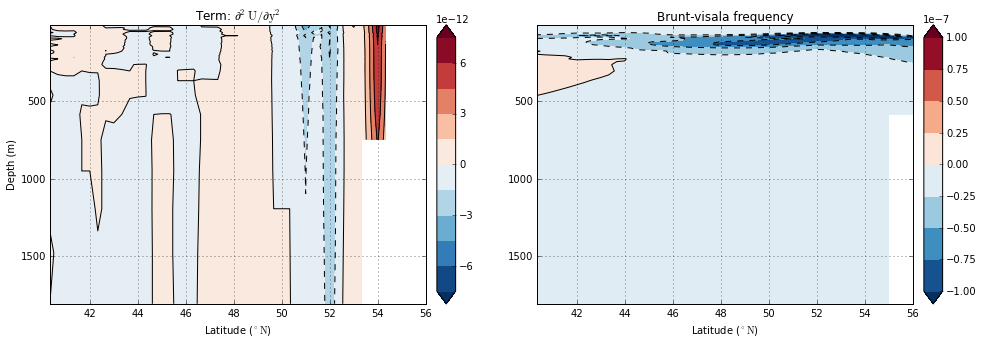

In [17]:
DuDylevs = np.arange(-7.5, 9, 1.5)*1e-12
Nlevs = np.arange(-1, 1.25, 0.25)*1e-7

fig=plt.figure(figsize=(16, 5))

ax1=plt.subplot2grid((1, 2), (0, 0), colspan=1, rowspan=1)
ax2=plt.subplot2grid((1, 2), (0, 1), colspan=1, rowspan=1)
divider1 = make_axes_locatable(ax1); cax1 = divider1.append_axes("right", "5%", pad="3%")
divider2 = make_axes_locatable(ax2); cax2 = divider2.append_axes("right", "5%", pad="3%")

CS=ax1.contourf(latitude, depth, term2, DuDylevs, cmap=plt.cm.RdBu_r, extend='both')
ax1.contour(latitude, depth, term2, DuDylevs, colors = ('k',), linewidth=1)
ax1.invert_yaxis(); ax1.grid(); 
ax1.set_title('Term: $\mathrm{\partial^2U/\partial y^2}$', fontsize=12)
ax1.set_xlabel('Latitude ($\mathrm{^\circ N}$)'); ax1.set_ylabel('Depth (m)')
plt.colorbar(CS, cax=cax1)

CS=ax2.contourf(latitude, depth, BVfreq(s, depth), Nlevs, cmap=plt.cm.RdBu_r, extend='both')
ax2.contour(latitude, depth, BVfreq(s, depth), Nlevs, colors = ('k',), linewidth=1)
ax2.invert_yaxis(); ax2.grid(); ax2.set_title('Brunt-visala frequency', fontsize=12)
ax2.set_xlabel('Latitude ($\mathrm{^\circ N}$)')
plt.colorbar(CS, cax=cax2)

<matplotlib.colorbar.Colorbar instance at 0x0000000017411888>

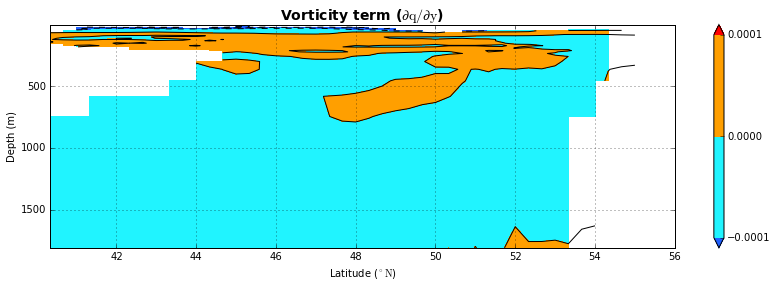

In [18]:
qlev = np.array([-1, 0, 1])*1e-4
fig=plt.figure(figsize=(14, 4))
ax=fig.gca()
CS=ax.contourf(latitude, depth, dq_dy, qlev, cmap=cm.GMT_no_green, extend='both')
ax.contour(latitude, depth, term3, lev=[0], colors=('k',))
ax.invert_yaxis(); ax.grid(); 
ax.set_title('Vorticity term ($\mathrm{\partial q/\partial y}$)', \
             fontsize=14, fontweight='bold')
ax.set_xlabel('Latitude ($\mathrm{^\circ N}$)'); ax.set_ylabel('Depth (m)')
plt.colorbar(CS)